In [1]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import jax
import jax.numpy as jnp
import sympy as sp

### Question 4

$$f(x, y) = x^2y + y^3sin(x)$$
$$g(x, y) = \frac{\partial f}{\partial x} = 2xy+ y^3cos(x)$$
$$h(x, y) = \frac{\partial f}{\partial y} = x^2+ 3y^2sin(x)$$

### Question 5

In [2]:
# Using JAX

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)


def g(x, y):
    return 2*x*y + y**3 * jnp.cos(x)


def h(x, y):
    return x**2 + 3 * y**2 * jnp.sin(x)


# argnums=(0, 1) to compute with respect to both x and y
grad_f = jax.grad(f, argnums=(0, 1))

# Test point
x_val = 1.0
y_val = 2.0

# Evaluate the gradient at (x_val, y_val)
grad_at_point = grad_f(x_val, y_val)
print(grad_at_point)
print(g(x_val, y_val), h(x_val, y_val))

(Array(8.322418, dtype=float32, weak_type=True), Array(11.0976515, dtype=float32, weak_type=True))
8.322418 11.097652


### Question 6

In [3]:
# Using Sympy

x, y = sp.symbols('x y')

f = x**2 * y + y**3 * sp.sin(x)

grad_f_x = sp.diff(f, x)
grad_f_y = sp.diff(f, y)

print("Gradient w.r.t x:", grad_f_x)
print("Gradient w.r.t y:", grad_f_y)

Gradient w.r.t x: 2*x*y + y**3*cos(x)
Gradient w.r.t y: x**2 + 3*y**2*sin(x)


### Question 7

In [4]:
student_records = {
  '2022': {
    'CSE': {
      '21110136': {
        'name': 'Naman Dharmani',
        'marks': {
          'maths': 42,
          'english': 96
        }
      }
    }
  },
  '2023': {
    'EE': {
      '21110136': {
        'name': 'Naman Dharmani',
        'marks': {
          'sanskrit': 84,
          'science': 99
        }
      }
    }
  }
}

print(json.dumps(student_records, indent=2))

{
  "2022": {
    "CSE": {
      "21110136": {
        "name": "Naman Dharmani",
        "marks": {
          "maths": 42,
          "english": 96
        }
      }
    }
  },
  "2023": {
    "EE": {
      "21110136": {
        "name": "Naman Dharmani",
        "marks": {
          "sanskrit": 84,
          "science": 99
        }
      }
    }
  }
}


### Question 8

In [5]:
# overall database
db = []


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)


class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []

    def add_student(self, student):
        self.students.append(student)


class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks


class Marks:
    def __init__(self, maths, english):
        self.maths = maths
        self.english = english

In [6]:
# Populate the database
year_2022 = Year(2022)
branch_1_2022 = Branch("CSE")
branch_1_2022.add_student(Student(21110136, "Naman", Marks(42, 96)))
branch_1_2022.add_student(Student(21110178, "Dhruv", Marks(80, 90)))
year_2022.add_branch(branch_1_2022)
db.append(year_2022)

year_2023 = Year(2023)
branch_2_2023 = Branch("EE")
branch_2_2023.add_student(Student(21110136, "Naman", Marks(84, 99)))
year_2023.add_branch(branch_2_2023)
db.append(year_2023)

# Print the database
for year in db:
    print(year)

### Question 9

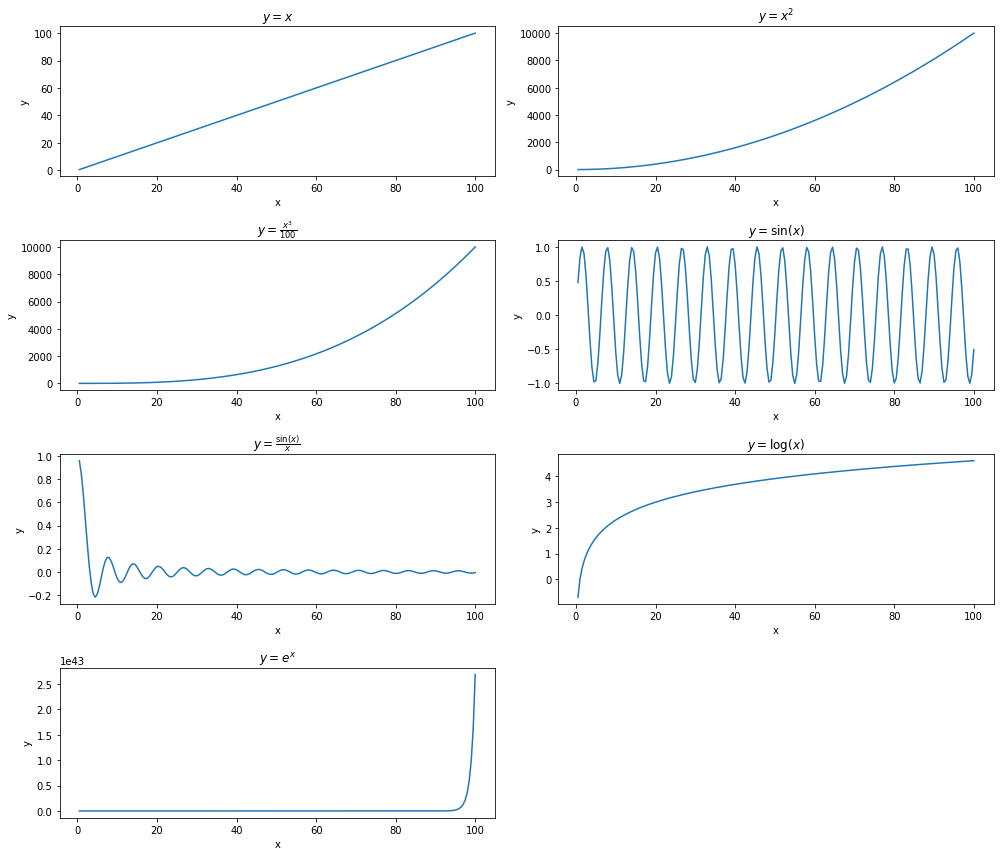

In [7]:
x = np.arange(0.5, 100.5, 0.5)

# Defining the functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

fig, axs = plt.subplots(4, 2, figsize=(14, 12))

axs[0, 0].plot(x, y1)
axs[0, 0].set_title(r'$y = x$')

axs[0, 1].plot(x, y2)
axs[0, 1].set_title(r'$y = x^2$')

axs[1, 0].plot(x, y3)
axs[1, 0].set_title(r'$y = \frac{x^3}{100}$')

axs[1, 1].plot(x, y4)
axs[1, 1].set_title(r'$y = \sin(x)$')

axs[2, 0].plot(x, y5)
axs[2, 0].set_title(r'$y = \frac{\sin(x)}{x}$')

axs[2, 1].plot(x, y6)
axs[2, 1].set_title(r'$y = \log(x)$')

axs[3, 0].plot(x, y7)
axs[3, 0].set_title(r'$y = e^x$')

fig.delaxes(axs[3, 1]) # delete the last unused axes

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

plt.tight_layout()
plt.show()

### Question 10

In [8]:
matrix = np.random.uniform(1, 2, size=(20, 5))

# creating dataframe out of it
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

print(f"Column with the highest standard deviation: {df.std().idxmax()}")

min_mean_row_index = df.mean(axis=1).idxmin()
print(f"Row with the lowest mean: {min_mean_row_index}")
print(df.loc[min_mean_row_index])

Column with the highest standard deviation: e
Row with the lowest mean: 14
a    1.358324
b    1.324217
c    1.369329
d    1.241189
e    1.114078
Name: 14, dtype: float64


### Question 11

In [9]:
df["f"] = df[["a", "b", "c", "d", "e"]].sum(axis=1)
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")

lt8_rows = (df["g"] == "LT8").sum()
print(f"Number of rows where the value in the column 'g' is 'LT8': {lt8_rows}")

std_dev_lt8 = df.loc[df["g"] == "LT8", "f"].std()
std_dev_gt8 = df.loc[df["g"] == "GT8", "f"].std()
print(f"Standard deviation of the column 'f' for the rows with 'LT8' and 'GT8' values")
print((std_dev_lt8, std_dev_gt8))

Number of rows where the value in the column 'g' is 'LT8': 16
Standard deviation of the column 'f' for the rows with 'LT8' and 'GT8' values
(0.450320828691069, 0.31811201746094286)


### Question 12

Broadcasting allows to perform operations on arrays with different shapes and sizes.

In [10]:
a = np.array([1, 2, 3])
b = np.array([[10], [20], [30]])

# Perform element-wise addition using broadcasting
result = a + b

print(result)

[[11 12 13]
 [21 22 23]
 [31 32 33]]


### Question 13

In [11]:
def argmin(arr):
    min_val = arr[0]
    min_idx = 0
    for i, val in enumerate(arr):
        if val < min_val:
            min_val = val
            min_idx = i
    return min_idx

arr = np.array([3, 1, 4, 2, 5])
print(argmin(arr))

# Verify using np.argmin
print(np.argmin(arr))

1
1
